In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [2]:
filepath_home= 'D:/Dacon_Psychological_disposition/'
filepath_out = 'C:/임시/Dacon_Psychological_disposition/' 
train = pd.read_csv(filepath_home+'train_preprocessed.csv')
test = pd.read_csv(filepath_home+'test_preprocessed.csv')

In [3]:
total_negative_cols = ["QeA", "QfA", "QkA", "QqA", "QrA", "QaA", "QdA", "QgA", "QiA", "QnA"]
train[total_negative_cols] = 6-train[total_negative_cols]
train['mach_score'] = train.apply(lambda x:x.iloc[0:40:2].mean(),axis=1)

In [4]:
train[['tp02','tp04','tp06','tp08','tp10']]= 6-train[['tp02','tp04','tp06','tp08','tp10']]

train['Extraversion']=(train.tp01+train.tp06)/2
train['Agreeableness']=(train.tp02+train.tp07)/2
train['Conscientiousness']=(train.tp03+train.tp08)/2
train['Emotional Stability']=(train.tp04+train.tp09)/2
train['Openness to Experiences']=(train.tp05+train.tp10)/2

# 1. TIPI 유형과 MACH 점수와의 관계

In [5]:
# TIPI
tp_cols = ['Extraversion','Agreeableness','Conscientiousness','Emotional Stability','Openness to Experiences']
#train.groupby(tp_cols)['voted'].mean()
train[tp_cols+['mach_score']].corr(method='spearman')

,Extraversion,Agreeableness,Conscientiousness,Emotional Stability,Openness to Experiences,mach_score
Extraversion,1.000000,0.074520,0.046874,0.087655,0.231944,0.084890
Agreeableness,0.074520,1.000000,0.096895,0.077835,0.080684,0.478096
Conscientiousness,0.046874,0.096895,1.000000,0.282084,0.043331,0.107476
Emotional Stability,0.087655,0.077835,0.282084,1.000000,0.102359,-0.015156
Openness to Experiences,0.231944,0.080684,0.043331,0.102359,1.000000,-0.008133
mach_score,0.084890,0.478096,0.107476,-0.015156,-0.008133,1.000000


Agreeableness(친화성) 특성과 마키아적 성향은 서로 영향이 있다.

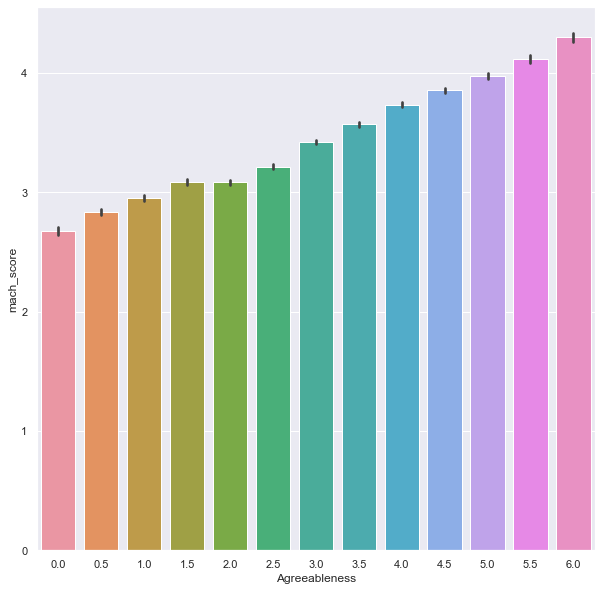

In [9]:
plt.figure(figsize=(10,10))
sns.barplot(x='Agreeableness',y='mach_score',data=train[(train.Agreeableness<=6)&(train.Agreeableness>=0)])

실제로 친화성 수치와 마키아 점수와의 관계가 직선형태를 이룸

# 2. 명목형 : age_group

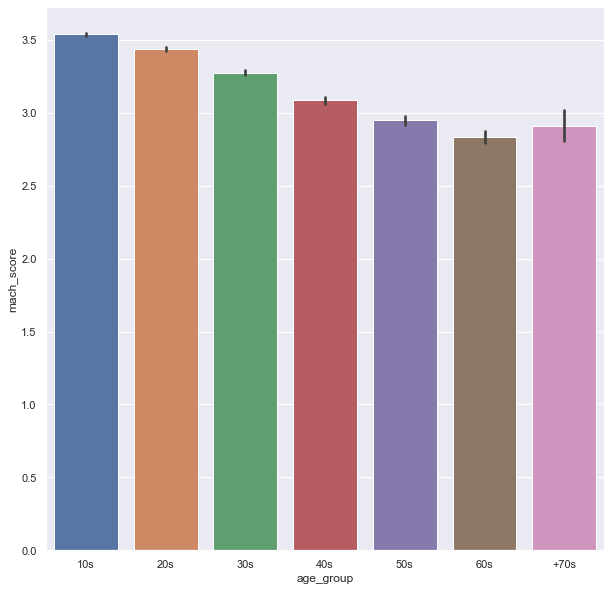

In [33]:
# age_group
plt.figure(figsize=(10,10))
sns.barplot(x='age_group',y='mach_score',data=train,
           order=['10s','20s','30s','40s','50s','60s','+70s'])

- 연령대가 높아질수록 마키아벨리즘 성향이 낮아지는것을 확인할 수 있음 

# ---
(확정 아님)  
Tp 성향으로 kmeans 군집화한 마키아벨리즘 스코어 그룹은 마키아벨리즘 스코어가 낮으면 투표율이 높았고 반대로 마키아벨리즘 스코어가 높으면 투표율이 낮았다. 